# Author : Srishti Jhunthra

### Task 3: Predict the percentage of an student based on the no. of study hours.

Supervised learning comes under the category which uses labeled datasets to train algorithms that to classify data or predict outcomes accurately. The given problem statement is a linear regression problem part of the supervised learning. 

##### Step 1: Import libraries 

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

##### Step 2: Obtain the dataset

In [3]:
dataset = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df= pd.read_csv(dataset) #read csv

In [4]:
df.head(10) #checking the csv obtained

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### Step 3: Analyse the dataset

In [5]:
df.info() #print the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Step 4: Plotting the scores

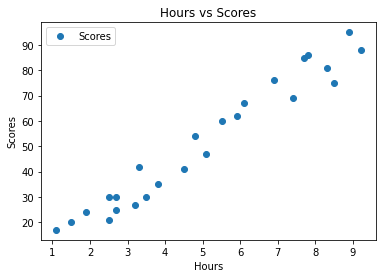

In [7]:
df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

##### Step 5: Splitting into training and test

In [8]:
X = df.iloc[:, :-1].values 
Y = df.iloc[:, 1].values  

In [9]:
from sklearn.model_selection import train_test_split #selecting model

In [10]:
#splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

##### Step 6: Training model using Linear Regression

In [11]:
#importing library
from sklearn.linear_model import LinearRegression  

In [12]:
#training model
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression()

##### Step 7: Testing model

In [13]:
#testing
Y_pred = regressor.predict(X_test) 

In [14]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### Step 8: Evaluating model

In [15]:
from sklearn import metrics  

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) #scores

Mean Absolute Error: 4.183859899002975


In [17]:
r_sq = regressor.score(X_train, Y_train) 
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9515510725211552


In [18]:
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

intercept: 2.018160041434683
slope: [9.91065648]


##### Step 9: Plotting

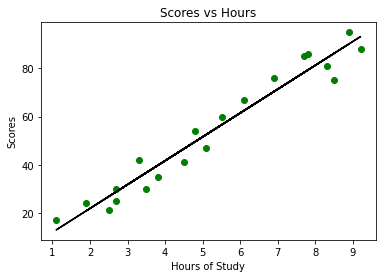

In [19]:
plt.scatter(X_train, Y_train, color = "green")
plt.plot(X_train, regressor.predict(X_train), color = "black")
plt.title("Scores vs Hours")
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.show()

In [20]:
print("Training Score:",regressor.score(X_train,Y_train)) #training score
print("Test Score:",regressor.score(X_test,Y_test)) #test score

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


##### What will be predicted score if a student studies for 9.25 hrs/ day? (Particuular case)

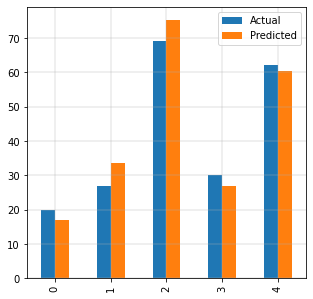

In [22]:
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.4')
plt.grid(which='minor', linewidth='0.4')
plt.show()

In [23]:
def score_pred(X,regressor):
    print('No. of hours studied:', X, sep='\t')
    print('score:',regressor.intercept_ + regressor.coef_ * X, sep='\t')
score_pred(9.25,regressor)

No. of hours studied:	9.25
score:	[93.69173249]
